Google, Amazon and more Employee Reviews 
https://www.kaggle.com/petersunga/google-amazon-facebook-employee-reviews
This dataset contains employee reviews separated into the following categories:
1.Index: index
2.Company: Company name
3.Location : This dataset is global, as such it may include the country's name in parenthesis [i.e "Toronto, ON(Canada)"]. However, if the location is in the USA then it will only include the city and state[i.e "Los Angeles, CA" ]
5.Date Posted: in the following format MM DD, YYYY
6.Job-Title: This string will also include whether the reviewer is a 'Current' or 'Former' Employee at the time of the review
7.Summary: Short summary of employee review
8.Pros: Pros
9.Cons: Cons
10.Overall Rating: 1-5
11.Work/Life Balance Rating: 1-5
12.Culture and Values Rating: 1-5
13.Career Opportunities Rating: 1-5
14.Comp & Benefits Rating: 1-5
15.Senior Management Rating: 1-5
16.Helpful Review Count: A count of how many people found the review to be helpful
17.Link to Review : This will provide you with a direct link to the page that contains the review. However it is likely that this link will be outdated
NOTE: 'none' is placed in all cells where no data value was found.

In [2]:
import numpy as np
import scipy as sp 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import os

In [3]:
data_path = "./employee_reviews.csv"

df= pd.read_csv(data_path, encoding = "ISO-8859-1")

In [4]:
df.head()

,Unnamed: 0,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,link
0,1,google,none,"Dec 11, 2018",Current Employee - Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,none,5.0,4.0,5.0,5.0,4.0,5.0,0,https://www.glassdoor.com/Reviews/Google-Revie...
1,2,google,"Mountain View, CA","Jun 21, 2013",Former Employee - Program Manager,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,4.0,2.0,3.0,3.0,5.0,3.0,2094,https://www.glassdoor.com/Reviews/Google-Revie...
2,3,google,"New York, NY","May 10, 2014",Current Employee - Software Engineer III,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5.0,5.0,4.0,5.0,5.0,4.0,949,https://www.glassdoor.com/Reviews/Google-Revie...
3,4,google,"Mountain View, CA","Feb 8, 2015",Current Employee - Anonymous Employee,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,5.0,2.0,5.0,5.0,4.0,5.0,498,https://www.glassdoor.com/Reviews/Google-Revie...
4,5,google,"Los Angeles, CA","Jul 19, 2018",Former Employee - Software Engineer,"Unique, one of a kind dream job",Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv...",Promote managers into management for their man...,5.0,5.0,5.0,5.0,5.0,5.0,49,https://www.glassdoor.com/Reviews/Google-Revie...


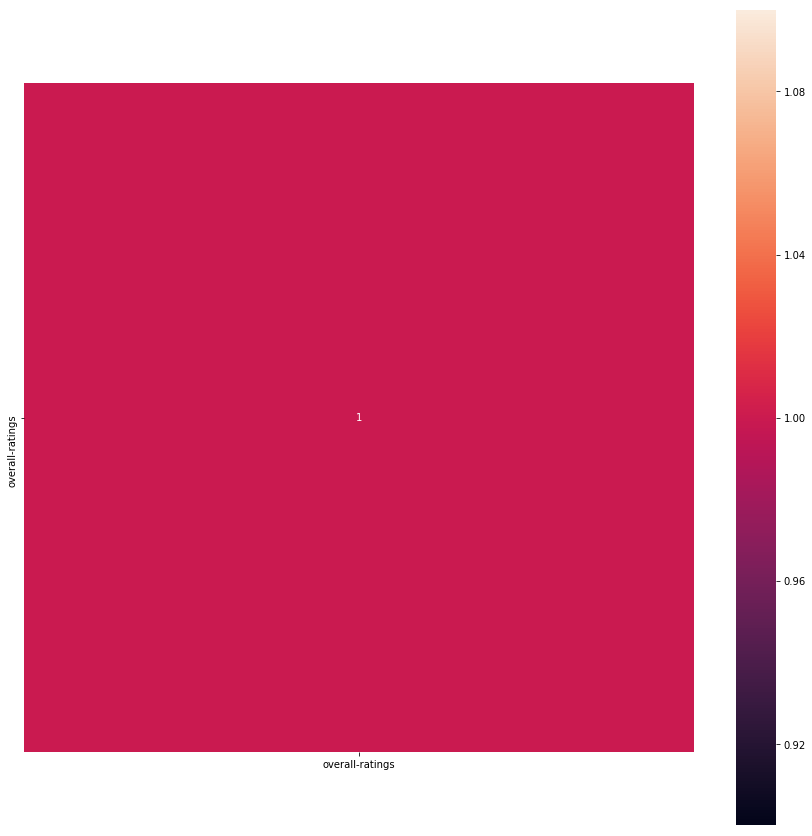

In [11]:
internal_chars = [ 'overall-ratings','culture-values-stars', 'work-balance-stars', 'carrer-opportunities-stars']
corrmat = df[internal_chars].corr()
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corrmat, square=True, annot=True)
plt.show()

In [13]:
df.describe()

,Unnamed: 0,overall-ratings,helpful-count
count,67529.000000,67529.000000,67529.000000
mean,33765.000000,3.826075,1.268211
std,19494.087501,1.154989,16.085852
min,1.000000,1.000000,0.000000
25%,16883.000000,3.000000,0.000000
50%,33765.000000,4.000000,0.000000
75%,50647.000000,5.000000,1.000000
max,67529.000000,5.000000,2094.000000


In [18]:
df_reviews=df.groupby("company").count()

In [21]:
df1=df_reviews.sort_values(by='summary',ascending=False)
df1

,Unnamed: 0,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,link
company,,,,,,,,,,,,,,,,
amazon,26430,26430,26430,26430,26391,26430,26430,26318,26430,26430,26430,26430,26430,26430,26430,26430
microsoft,17930,17930,17930,17930,17906,17930,17930,17850,17930,17930,17930,17930,17930,17930,17930,17930
apple,12950,12950,12950,12950,12922,12950,12950,12885,12950,12950,12950,12950,12950,12950,12950,12950
google,7819,7819,7819,7819,7804,7819,7819,7789,7819,7819,7819,7819,7819,7819,7819,7819
facebook,1590,1590,1590,1590,1585,1590,1590,1583,1590,1590,1590,1590,1590,1590,1590,1590
netflix,810,810,810,810,801,810,810,807,810,810,810,810,810,810,810,810


In [26]:
amazon=df[df.company == 'amazon']
amazon

,Unnamed: 0,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,link
7819,7820,amazon,"Phoenix, AZ",None,Current Employee - Software Development Manager,An Amazing Place to Work,"I've been at Amazon for a month now, and I've ...","No cons, so far - seriously. Like I said, I'm ...",none,5.0,4.0,5.0,5.0,5.0,5.0,580,https://www.glassdoor.com/Reviews/Amazon-Revie...
7820,7821,amazon,"Sunnyvale, CA","Dec 10, 2018","Current Employee - Manager, Software Developme...",Software Development Engineering Manager,"Work hard, have fun, make history. Be proud of...",RUS grand each year related to last year's sto...,none,5.0,5.0,5.0,5.0,4.0,5.0,0,https://www.glassdoor.com/Reviews/Amazon-Revie...
7821,7822,amazon,"Seattle, WA","Jan 10, 2016",Current Employee - Anonymous Employee,You Get What You Put In,"Really smart people, a lot of opportunity for ...",You have to be self motivated. NO ONE will hol...,More on-boarding training before new employees...,5.0,4.0,5.0,5.0,5.0,5.0,1759,https://www.glassdoor.com/Reviews/Amazon-Revie...
7822,7823,amazon,"Seattle, WA","Feb 20, 2016",Current Employee - Senior Engineering Manager,"Exciting Work, Abusive Culture","Jeff Bezos and his ""S-Team"" are brilliant and ...","The management process is abusive, and I'm cur...",Don't pretend that the recent NY Times article...,3.0,3.0,3.0,3.0,4.0,4.0,1404,https://www.glassdoor.com/Reviews/Amazon-Revie...
7823,7824,amazon,"Seattle, WA","Dec 17, 2013",Current Employee - Software Development Manager,"Can be amazing for some people, horrible for o...",Amazon is doing lot's of cool stuff...but lots...,- You're responsible for your own career progr...,Stack ranking is a horrible practice since it'...,4.0,3.0,3.0,5.0,5.0,4.0,1275,https://www.glassdoor.com/Reviews/Amazon-Revie...
7824,7825,amazon,"Seattle, WA","Mar 23, 2017",Former Employee - Anonymous Employee,We are now in a world where we are condescende...,This company gets A list performance from C li...,Maybe because the company recruits C listers w...,Bezos you bought the Washington Post and hired...,4.0,2.0,2.0,1.0,5.0,1.0,409,https://www.glassdoor.com/Reviews/Amazon-Revie...
7825,7826,amazon,"Carlisle, PA","May 15, 2017",Former Employee - Tier I Warehouse Associate,"Warehouse associate, full time for over two years",Great starting pay and the ability to get rais...,After 3 years of working with the company you ...,none,4.0,2.0,3.0,4.0,4.0,5.0,257,https://www.glassdoor.com/Reviews/Amazon-Revie...
7826,7827,amazon,"Seattle, WA","Mar 29, 2017",Current Employee - Finance Manager,"Great place to learn, churn n burn culture in ...","- super smart people, the best of the best fro...","- frugality is taken to the extreme, only 2 we...",The culture and reputation of amazon will neve...,4.0,1.0,2.0,4.0,3.0,3.0,245,https://www.glassdoor.com/Reviews/Amazon-Revie...
7827,7828,amazon,"Seattle, WA","Dec 7, 2018",Current Employee - Senior Product Manager,Sr. Product manager,Smartest people Iâve ever worked with. The a...,"Not a con, just hard work. But hard rewarding ...",Reconsider the base salary cap and lack of bas...,5.0,4.0,5.0,5.0,5.0,4.0,2,https://www.glassdoor.com/Reviews/Amazon-Revie...
7828,7829,amazon,none,"Dec 10, 2018",Current Employee - Anonymous Employee,Central operations,"Weekly pay, great pay,flexible shifts","Fighting for hours, unorganized and bad training",none,4.0,5.0,5.0,4.0,5.0,5.0,1,https://www.glassdoor.com/Reviews/Amazon-Revie...
